# Data Analysis Level 2

In [1]:
## Import Data
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
csv_file = "Dataset .csv"
dataset = pd.read_csv(csv_file)

# View data
dataset.head()
dataset.info()

<ipython-input-1-d4a07daa3a58>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Restuarant Rating

(-0.0059, 0.49]    2148
(0.49, 0.98]          0
(0.98, 1.47]          0
(1.47, 1.96]          3
(1.96, 2.45]        183
(2.45, 2.94]       1247
(2.94, 3.43]       2490
(3.43, 3.92]       2100
(3.92, 4.41]       1079
(4.41, 4.9]         301
Name: count, dtype: int64


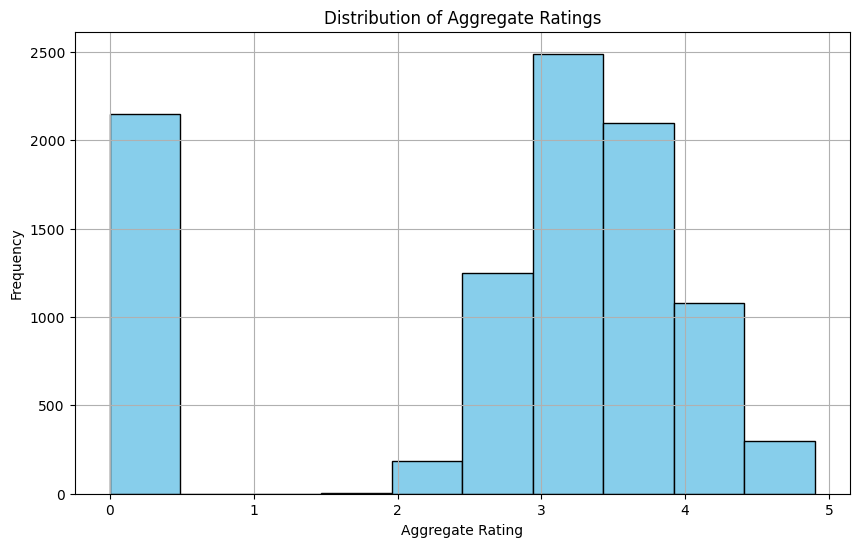

156.909747670401


In [4]:
# Analysing the distribution of 'Aggregate rating' and determine the most common rating range
range_distribution = dataset['Aggregate rating'].value_counts(bins=10, sort = False).sort_index()
print(range_distribution)

# Visualize the distribution rating
plt.figure(figsize=(10,6))
plt.hist(dataset['Aggregate rating'], bins=10, color='skyblue', edgecolor= 'black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculating the average number of votes received by restuarants
average_votes = dataset['Votes'].mean()
print(average_votes)

## Task 2: Cuisine Combination

In [6]:
## Identify the most common combinations of cuisines in the dataset
### First splitting the 'Cuisine' column to handle multiple cuisines
cuisine_combination = dataset['Cuisines'].dropna().str.split().explode()
print(cuisine_combination)

### Count the most common combination ( combination treated as strings here)
cuisine_combination_count = dataset['Cuisines'].value_counts().head(10)
print(cuisine_combination_count) 

### Determine if certain cuisine combination have higher ratings
### Grouping by 'Cuisines' and calculating the average aggregate rating for each combination
cuisine_rating = dataset.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)
# View all the result
print(cuisine_rating)

0          French,
0        Japanese,
0         Desserts
1         Japanese
2         Seafood,
           ...    
9548         World
9548       Cuisine
9549    Restaurant
9549          Cafe
9550          Cafe
Name: Cuisines, Length: 27655, dtype: object
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Na

## Task 3: Geographic Analysis


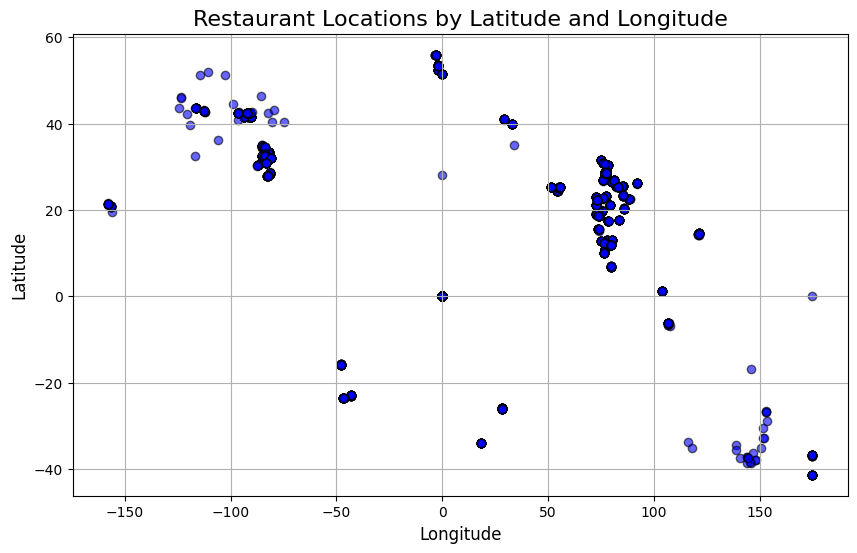

In [7]:
# Extract longitude and latitude data
longitude = dataset['Longitude']
latitude = dataset['Latitude']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', alpha=0.6, edgecolors='k')
plt.title('Restaurant Locations by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

## Task 4: Ratuarants Chains

In [13]:
# Task 4: Identify potential chains by checking for repeated restuarant names
restuarant_chains = dataset['Restaurant Name'].value_counts()
chains = restuarant_chains[restuarant_chains > 1]
print(chains)
## Filter the datast for only the identified restuarant chains
chain_names = chains.index.tolist()
chain_data = dataset[dataset['Restaurant Name'].isin(chain_names)]

## Group by the 'restaurant name' and calculate average rating and total votes for each chain
chain_analysis = chain_data.groupby('Restaurant Name').agg(average_rating = ('Aggregate rating','mean'),
                                                           total_votes = ('Votes', 'sum'),
                                                           number_of_locations = ('Restaurant ID','count')).sort_values(by='average_rating',ascending = False)
#Display the anaysis results for top chains
chain_analysis.head(10)



Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


,average_rating,total_votes,number_of_locations
Restaurant Name,,,
Talaga Sampireun,4.900,5514,3
Silantro Fil-Mex,4.850,1364,2
AB's Absolute Barbecues,4.850,3151,2
AB's - Absolute Barbecues,4.825,13400,4
Naturals Ice Cream,4.800,3094,2
Gymkhana,4.700,328,2
The Cheesecake Factory,4.650,3010,2
Dishoom,4.600,1269,2
Garota de Ipanema,4.600,59,2
